In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [48]:
df = pd.read_csv('cleaned_data_SC.csv', encoding='unicode_escape')
df.head()

,Unnamed: 0,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,...,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,...,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,...,327.75,311.359985,-249.089996,South Asia,RajastÃ¡n,PENDING,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,...,327.75,309.720001,-247.779999,South Asia,RajastÃ¡n,CLOSED,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,...,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,...,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,1/15/2018 11:24,Standard Class


In [49]:
mylabels = ['DEBIT','TRANSFER', 'PAYMENT', 'CASH']
mylabels
df['Type'].value_counts()

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64

([<matplotlib.patches.Wedge at 0x209a5a7a9a0>,
 [Text(0.39248757740261486, 1.0275959816896068, 'DEBIT'),
  Text(-1.0894780874002403, -0.15178108273007646, 'TRANSFER'),
  Text(0.1773050324196299, -1.085616380439552, 'PAYMENT'),
  Text(1.0365232097192523, -0.368265713464204, 'CASH')])

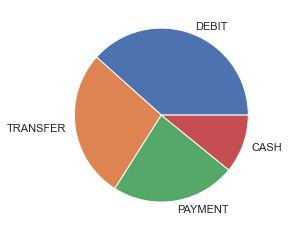

In [50]:
plt.pie(100*df['Type'].value_counts()/len(df), labels = mylabels)

In [51]:
data_delivery_status= df.groupby(['Delivery Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(x=data_delivery_status['Delivery Status'] , y=data_delivery_status['Number of Orders']  , color=data_delivery_status['Number of Orders'],
      labels = { 'Delivery Status': 'Delivery Status', 'Number of Orders': 'Number of Orders'})

In [52]:
data_delivery_status_region=df.groupby(['Delivery Status', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(data_delivery_status_region, x='Delivery Status', y='Number of Orders'  , color='Order Region',
      )

In [53]:
data_Customer_Segment=df.groupby(['Customer Segment'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.pie(data_Customer_Segment, values='Number of Orders', names= 'Customer Segment' , title= 'Number of Orders of different Customer Segments', 
       width=600 , height=600 , color_discrete_sequence = px.colors.sequential.RdBu)

In [54]:
data_Category_Name=df.groupby(['Category Name'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(data_Category_Name, x='Number of Orders',y = 'Category Name',color ='Number of Orders')

In [55]:
df_sales_country=df.groupby([ 'Order Country'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Order Country',color ='Sales of Orders')

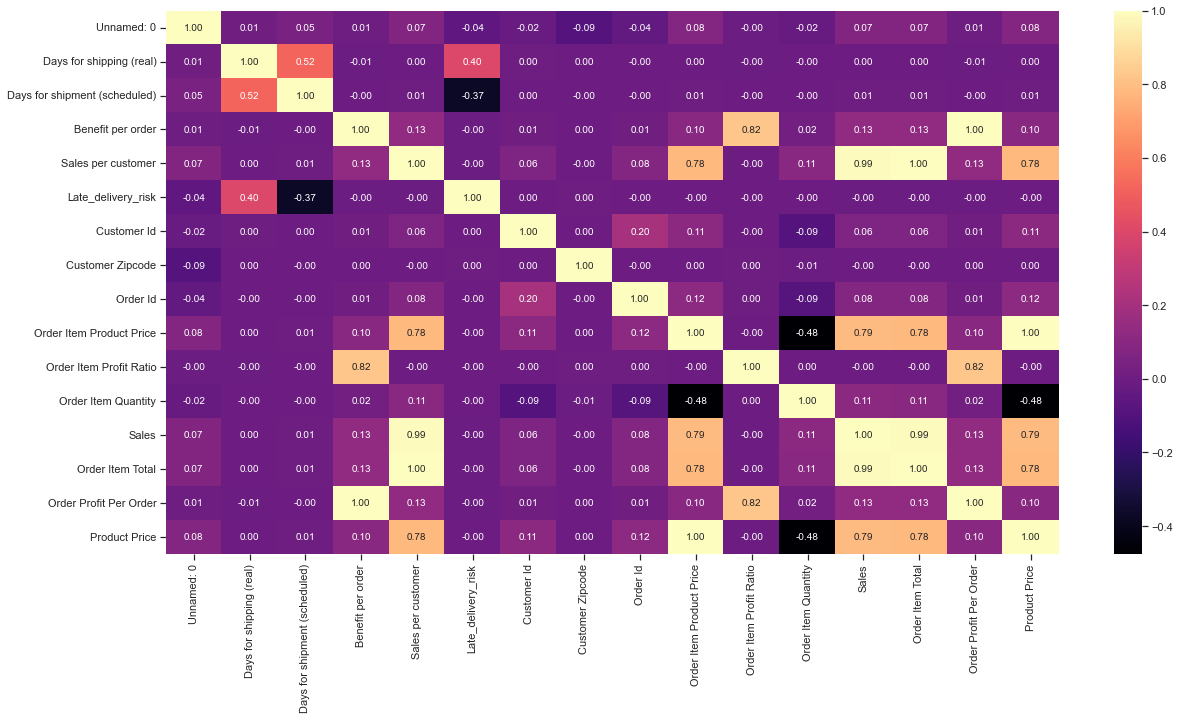

In [56]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'magma')